# Multiplication using LLMs

## Explanation:
1. Generate synthetic Data for multiplication using digit wise multiplication, then add the numbers which come from digit wise multiplication
2. Divide the synthetic Data into 2 (Training and Test)
3. Do finetune of OpenAI Model
4. Generate Data for benchmarking
5. Test Model on the Data generated for benchmarking

### Results:
1. The validation and training loss go to close to 0 within just 100 steps.
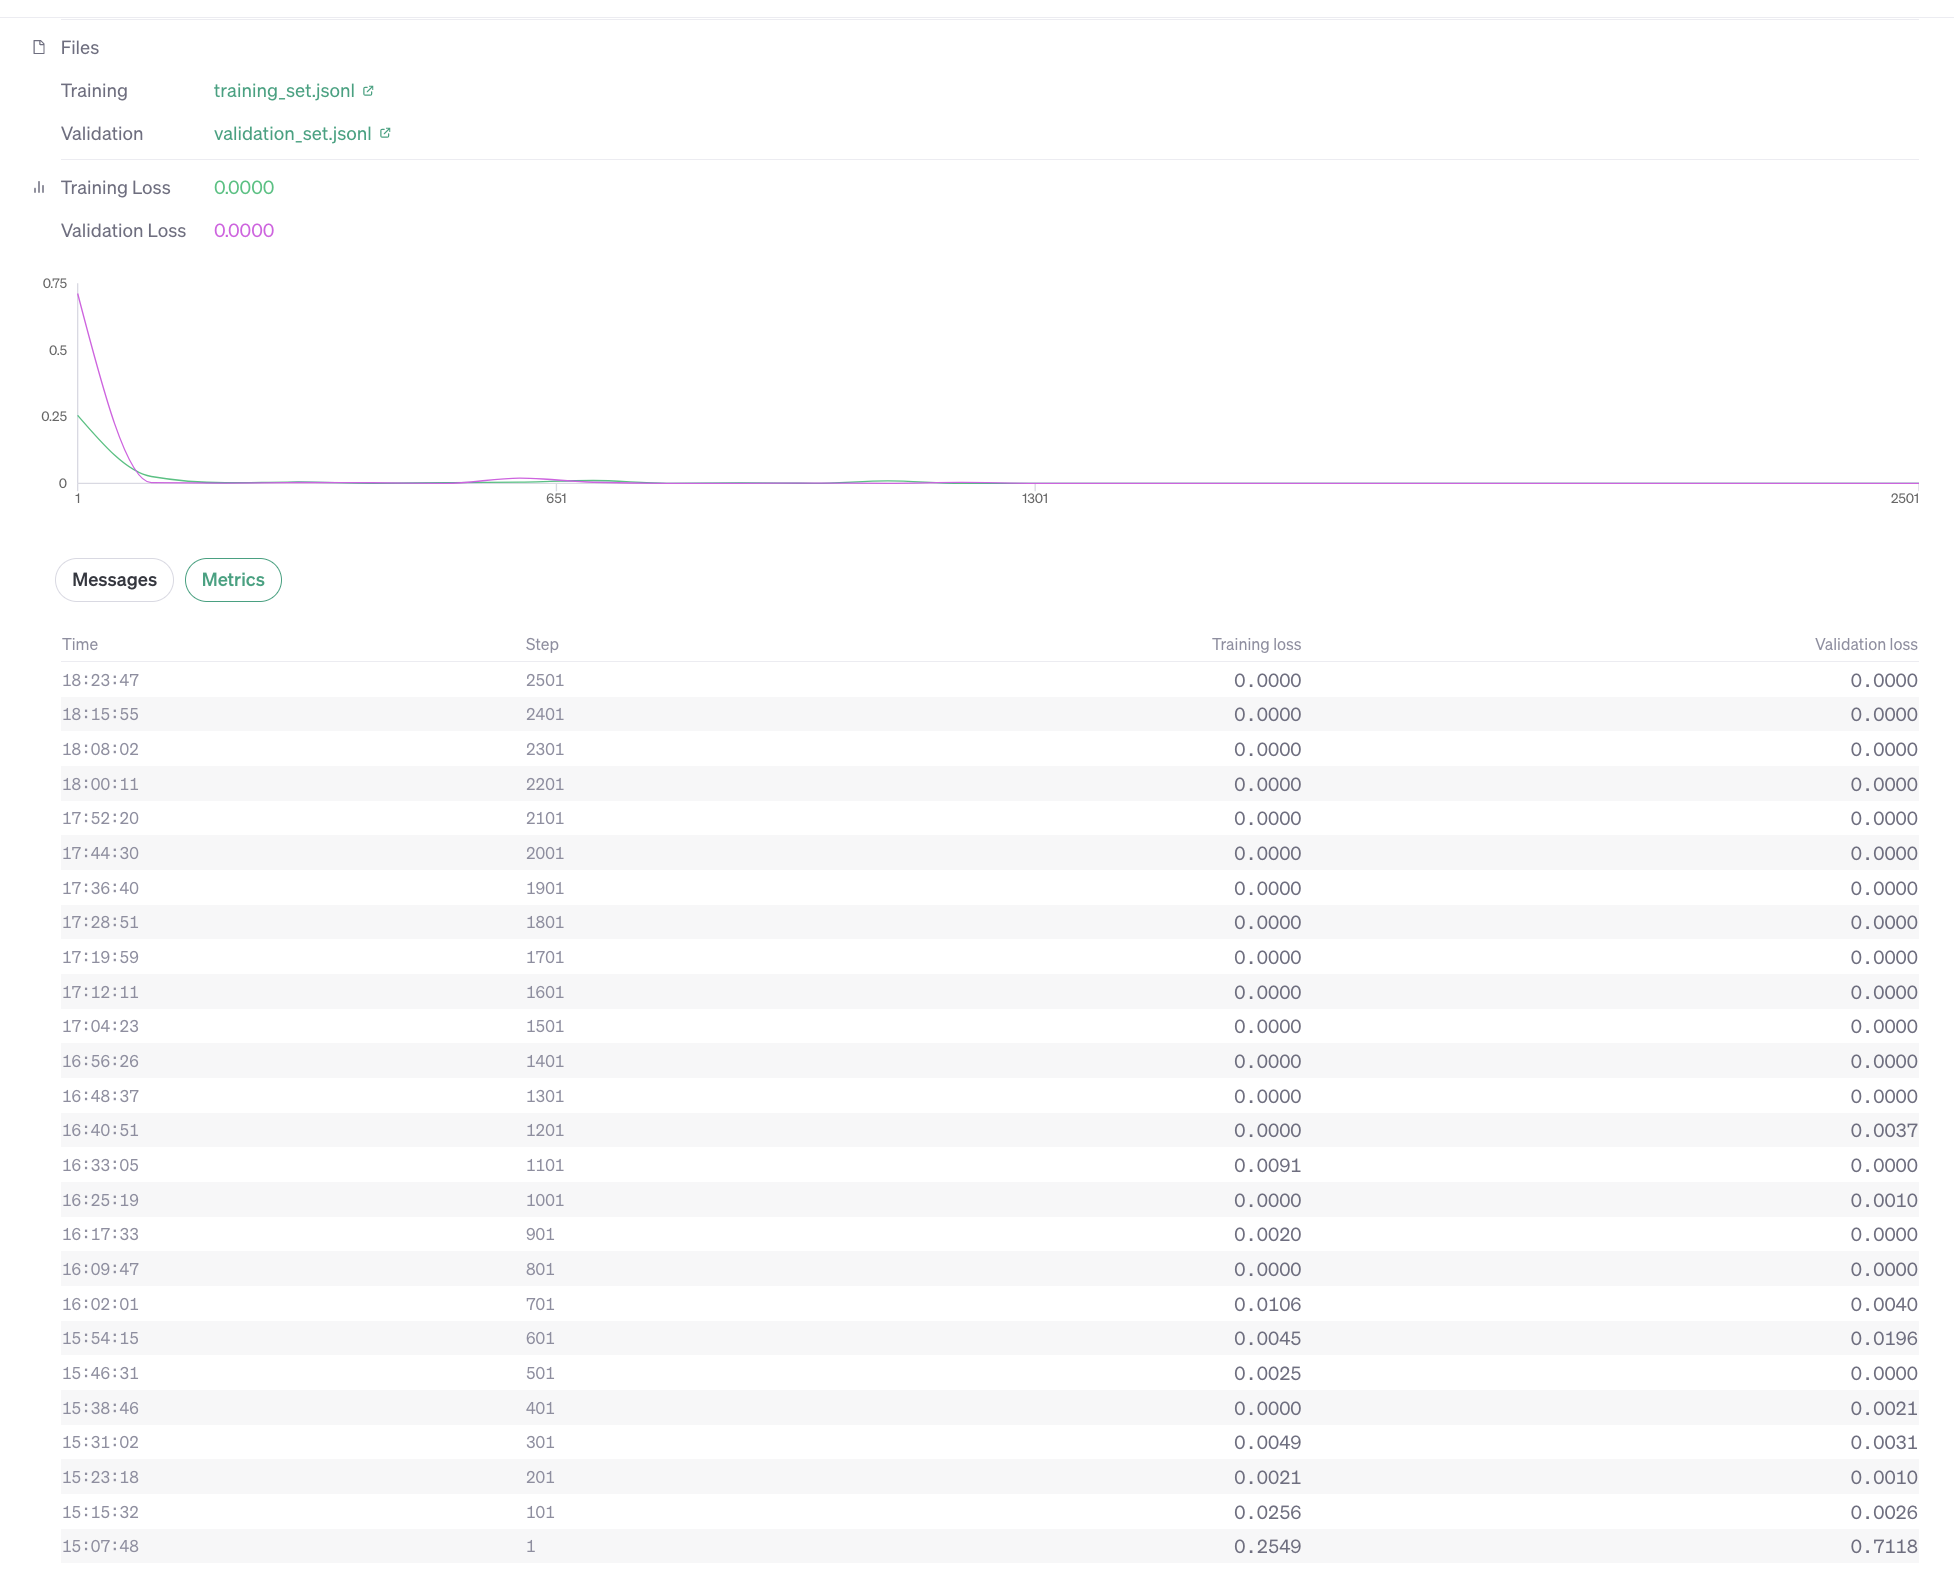
2. For the 200 test cases tested for benchmarking, the multiplication is done correctly for all excluding 3 cases which means an accuracy of 98.5% (I'm seeking more inputs from community to test any better). Even for the cases where incorrrect value is being given, the Gpt is able to follow the procedure correctly but during the final additional post digit wise multiplication, sometimes it's not able to recognizine the digits in the right place although for most cases it's able to

### 1. Generating Synthetic Multiplication Procedure Data

In [22]:
corresponding_digit = {
    1: "1st",
    2: "2nd",
    3: "3rd",
    4: "4th",
    5: "5th",
    6: "6th",
    7: "7th",
    8: "8th",
    9: "9th",
    10: "10th",
    11: "11th",
    12: "12th",
    13: "13th",
    14: "14th",
    15: "15th",
    16: "16th",
    17: "17th",
    18: "18th",
    19: "19th",
    20: "20th",
    21: "21th",
    22: "22nd"
}

In [23]:
def get_digits_position(Num, character):
    digits_position = "Num" + character + " digits from units position = ["
    numbers = []

    while Num != 0:
        numbers.append(Num%10)
        Num = Num//10

    for index in range(len(numbers)):
        if index != len(numbers) - 1:
            digits_position += corresponding_digit[index + 1] + "=" + str(numbers[index]) + ","
        else:
            digits_position += corresponding_digit[index + 1] + "=" + str(numbers[index])
    digits_position += "]"

    return digits_position

In [ ]:
print(get_digits_position(20, "A"))
print(get_digits_position(2, "B"))
print(get_digits_position(200, "A"))

NumA digits from units position = [1st=0,2nd=2]
NumB digits from units position = [1st=2]
NumA digits from units position = [1st=0,2nd=0,3rd=2]


In [ ]:
print(get_digits_position(188288635786641216, "A"))

NumA digits from units position = [1st=6,2nd=1,3rd=2,4th=1,5th=4,6th=6,7th=6,8th=8,9th=7,10th=5,11th=3,12th=6,13th=8,14th=8,15th=2,16th=8,17th=8,18th=1]


In [24]:
global values
values = []

global overall_add
overall_add = 0

In [25]:
def digit_multiplication(numA, numB_digit, digit_number):
    digit_multiplication = "Applying operation on NumB " + corresponding_digit[digit_number] + " digit operation\n\n"
    digit_multiplication += str(numA) + " <<*>> " + str(numB_digit) + " {\n"

    remainders = []
    numAIterate = numA
    cnt = 1
    carry = 0
    rem = 0

    while numAIterate:
        if cnt == 1:
            numA_digit = numAIterate%10
            mul = numA_digit*numB_digit
            rem = mul % 10
            carry = mul//10

            digit_multiplication += "NumA " + corresponding_digit[cnt] + "=" + str(numA_digit) + ", "
            digit_multiplication += "mul" + str(cnt) + "=" + str(numA_digit) + "*" + str(numB_digit) + "=" + str(mul) + ", "
            digit_multiplication += "rem" + str(cnt) + "=" + "mul" + str(cnt) + "%10=" + str(rem) + ", "
            digit_multiplication += "carry" + str(cnt) + "=" + "mul" + str(cnt) + "/10=" + str(carry)
        else:
            numA_digit = numAIterate%10
            mul = numA_digit*numB_digit
            add = mul + carry
            rem = add % 10
            div = add // 10

            digit_multiplication += "NumA " + corresponding_digit[cnt] + "=" + str(numA_digit) + ", "
            digit_multiplication += "mul" + str(cnt) + "=" + str(numA_digit) + "*" + str(numB_digit) + "=" + str(mul) + ", "
            digit_multiplication += "add" + str(cnt) + "=mul" + str(cnt) + "+" + "carry" + str(cnt-1) + "=" + str(mul) + "+" + str(carry) + "=" + str(add) + ", "
            digit_multiplication += "rem" + str(cnt) + "=" + "add" + str(cnt) + "%10=" + str(rem) + ", "
            digit_multiplication += "carry" + str(cnt) + "=" + "add" + str(cnt) + "/10=" + str(div)
            carry = div
        numAIterate = numAIterate // 10
        cnt = cnt + 1
        digit_multiplication = digit_multiplication + "\n"
        remainders.append(rem)

    digit_multiplication += "}"

    value = ""
    if carry != 0:
        value += str(carry)
        digit_multiplication += "\nFinal Carry is not zero so OverallValue = [carry" + str(cnt) + ", "
    else:
        digit_multiplication += "\nFinal Carry is zero so OverallValue = ["

    for index in range(len(remainders) - 1, -1, -1):
        value += str(remainders[index])
        if index == 0:
            digit_multiplication += "rem" + str(index + 1) + "]"
        else:
            digit_multiplication += "rem" + str(index + 1) + ","
    digit_multiplication += "=" +  value

    power = int (pow(10, digit_number-1))
    overall_value = int(value) * power
    digit_multiplication += "\nNum" + str(digit_number) + " = OverallValue*10^(" + str(digit_number) + "-1) = "
    digit_multiplication += value + "*" + str(power) + "=" + str(overall_value)

    values.append(overall_value)

    return digit_multiplication

In [ ]:
digit_multiplication(int(123), 4, 1)

'Applying operation on NumB 1st digit operation\n\n123 <<*>> 4 {\nNumA 1st=3, mul1=3*4=12, rem1=mul1%10=2, carry1=mul1/10=1\nNumA 2nd=2, mul2=2*4=8, add2=mul2+carry1=8+1=9, rem2=add2%10=9, carry2=add2/10=0\nNumA 3rd=1, mul3=1*4=4, add3=mul3+carry2=4+0=4, rem3=add3%10=4, carry3=add3/10=0\n}\nFinal Carry is zero so OverallValue = [rem3,rem2,rem1]=492\nNum1 = OverallValue*10^(1-1) = 492*1=492'

In [ ]:
digit_multiplication(int(250), 4, 1)

'Applying operation on NumB 1st digit operation\n\n250 <<*>> 4 {\n    NumA 1st digit = 0, mul1 = 0*4 = 0, rem1 = mul1%10 = 0, carry1 = mul1/10 = 0\n    NumA 2nd digit = 5, mul2 = 5*4 = 20, add2 = mul2 + carry1 = 20 + 0 = 20, rem2 = add2%10 = 0, carry2 = add2/10 = 2\n    NumA 3rd digit = 2, mul3 = 2*4 = 8, add3 = mul3 + carry2 = 8 + 2 = 10, rem3 = add3%10 = 0, carry3 = add3/10 = 1\n}\nFinal Carry is not zero so OverallValue = [carry4, rem3, rem2, rem1] = 1000\nNum1 = OverallValue * 10^(1-1) = 1000 * 1 = 1000'

In [ ]:
digit_multiplication(int(3674324), 8, 1)

'Applying operation on NumB 1st digit operation\n\n3674324 <<*>> 8 {\n    NumA 1st digit = 4, mul1 = 4*8 = 32, rem1 = mul1%10 = 2, carry1 = mul1/10 = 3\n    NumA 2nd digit = 2, mul2 = 2*8 = 16, add2 = mul2 + carry1 = 16 + 3 = 19, rem2 = add2%10 = 9, carry2 = add2/10 = 1\n    NumA 3rd digit = 3, mul3 = 3*8 = 24, add3 = mul3 + carry2 = 24 + 1 = 25, rem3 = add3%10 = 5, carry3 = add3/10 = 2\n    NumA 4th digit = 4, mul4 = 4*8 = 32, add4 = mul4 + carry3 = 32 + 2 = 34, rem4 = add4%10 = 4, carry4 = add4/10 = 3\n    NumA 5th digit = 7, mul5 = 7*8 = 56, add5 = mul5 + carry4 = 56 + 3 = 59, rem5 = add5%10 = 9, carry5 = add5/10 = 5\n    NumA 6th digit = 6, mul6 = 6*8 = 48, add6 = mul6 + carry5 = 48 + 5 = 53, rem6 = add6%10 = 3, carry6 = add6/10 = 5\n    NumA 7th digit = 3, mul7 = 3*8 = 24, add7 = mul7 + carry6 = 24 + 5 = 29, rem7 = add7%10 = 9, carry7 = add7/10 = 2\n}\nFinal Carry is not zero so OverallValue = [carry8, rem7, rem6, rem5, rem4, rem3, rem2, rem1] = 29394592\nNum1 = OverallValue * 10^

In [ ]:
values = []

In [26]:
def get_digits_mul(NumA, NumB):
    NumBIterate = NumB

    all_digits_mul = ""
    cnt = 1
    while NumBIterate != 0:
        all_digits_mul += digit_multiplication(NumA, NumBIterate%10, cnt) + "\n\n"
        NumBIterate = NumBIterate//10
        cnt = cnt + 1
    return all_digits_mul

In [27]:
def get_digits_add_1(add_num, num2, index):
    # print("add_num ", str(add_num), " num2 ", str(num2), " index ", str(index))
    first_num = ""
    second_num = "Num" + str(index + 1)

    final_numbers = []

    if index == 1:
        first_num = "Num1"
    else:
        first_num = "Add" + str(index - 1)

    two_digits_add = ""
    add_num_iterate = add_num
    num2_iterate = num2

    two_digits_add += first_num + " digits from units position: ["
    cnt = 1
    while add_num_iterate:
        if add_num_iterate//10 == 0:
            two_digits_add += corresponding_digit[cnt] + "=" + str(add_num_iterate%10)
        else:
            two_digits_add += corresponding_digit[cnt] + "=" + str(add_num_iterate%10) + ","
        add_num_iterate = add_num_iterate//10
        cnt += 1
    two_digits_add += "]\n"

    two_digits_add += second_num + " digits from units position: ["
    cnt = 1
    while num2_iterate:
        if num2_iterate//10 == 0:
            two_digits_add += corresponding_digit[cnt] + "=" + str(num2_iterate%10)
        else:
            two_digits_add += corresponding_digit[cnt] + "=" + str(num2_iterate%10) + ","

        num2_iterate = num2_iterate//10
        cnt += 1
    two_digits_add += "]\n\n"

    two_digits_add += str(add_num) + " <<+>> " + str(num2) + " {\n"

    add_num_iterate = add_num
    num2_iterate = num2

    cnt = 1
    carry = 0
    while add_num_iterate != 0 or num2_iterate != 0 or carry != 0:
        if add_num_iterate != 0:
            two_digits_add += first_num + " " + corresponding_digit[cnt] + "=" + str(add_num_iterate%10) + ", "
        else:
            two_digits_add += first_num + " " + corresponding_digit[cnt] + " Digit is not present, "

        if num2_iterate != 0:
            two_digits_add += second_num + " " + corresponding_digit[cnt] + "=" + str(num2_iterate%10) + ", "
        else:
            two_digits_add += second_num + " " + corresponding_digit[cnt] + " Digit is not present, "

        if cnt == 1:
            add = add_num_iterate%10 + num2_iterate%10
            two_digits_add += "add" + str(cnt) + "=" + str(add_num_iterate%10) + "+" + str(num2_iterate%10) + "=" + str(add) + ", "
            carry = add//10
            two_digits_add += "rem" + str(cnt) + "=" + "add" + str(cnt) + "%" + str(10) + "=" + str(add%10) + ", "
            two_digits_add += "carry" + str(cnt) + "=" + "add" + str(cnt) + "/" + str(10) + "=" + str(carry) + " "
            final_numbers.append({"rem" + str(cnt) : str(add%10)})
        else:
            add = add_num_iterate%10 + num2_iterate%10 + carry
            two_digits_add += "carry" + str(cnt-1) + "=" + str(carry) + ", "
            if add_num_iterate == 0 and num2_iterate == 0 and carry != 0:
                two_digits_add += "carry" + str(cnt) + "=" + str(carry%10)
                final_numbers.append({"carry" + str(cnt) : str(carry%10)})
                carry = carry//10
            else:
                if add_num_iterate == 0 and num2_iterate != 0:
                    two_digits_add += "add" + str(cnt) + "=" + str(num2_iterate%10) + "+" + str(carry) + "=" + str(add) + ", "
                    carry = add//10
                    two_digits_add += "rem" + str(cnt) + "=" + "add" + str(cnt) + "%" + str(10) + "=" + str(add%10) + ", "
                    two_digits_add += "carry" + str(cnt) + "=" + "add" + str(cnt) + "/" + str(10) + "=" + str(carry) + " "
                    final_numbers.append({"rem" + str(cnt) : str(add%10)})
                elif add_num_iterate != 0 and num2_iterate == 0:
                    two_digits_add += "add" + str(cnt) + "=" + str(add_num_iterate%10) + "+" + str(carry) + "=" + str(add) + ", "
                    carry = add//10
                    two_digits_add += "rem" + str(cnt) + "=" + "add" + str(cnt) + "%" + str(10) + "=" + str(add%10) + ", "
                    two_digits_add += "carry" + str(cnt) + "=" + "add" + str(cnt) + "/" + str(10) + "=" + str(carry) + " "
                    final_numbers.append({"rem" + str(cnt) : str(add%10)})
                else:
                    two_digits_add += "add" + str(cnt) + "=" + str(add_num_iterate%10) + "+" + str(num2_iterate%10) + "+" + str(carry) + "=" + str(add) + ", "
                    carry = add//10
                    two_digits_add += "rem" + str(cnt) + "=" + "add" + str(cnt) + "%" + str(10) + "=" + str(add%10) + ", "
                    two_digits_add += "carry" + str(cnt) + "=" + "add" + str(cnt) + "/" + str(10) + "=" + str(carry) + " "
                    final_numbers.append({"rem" + str(cnt) : str(add%10)})

        add_num_iterate = add_num_iterate//10
        num2_iterate = num2_iterate//10
        cnt += 1
        two_digits_add += "\n"
    two_digits_add += "}\n\n"

    two_digits_add += "Add" + str(index) + " = ["
    for index in range(len(final_numbers) - 1, -1, -1):
        if index != 0:
            for key in final_numbers[index].keys():
                two_digits_add += key + ","
        else:
            for key in final_numbers[index].keys():
                two_digits_add += key + "] = "

    overall_value = ""
    for index in range(len(final_numbers) - 1, -1, -1):
        for value in final_numbers[index].values():
            overall_value += value

    # print("overall_value: ", overall_value)

    global overall_add
    # print(overall_add)
    overall_add = int (overall_value)

    two_digits_add += overall_value

    return two_digits_add

In [28]:
def get_digits_add():
    all_digits_add = ""
    all_digits_add += "NumA <<*>> NumB = "

    for index in range(0, len(values)):
        if index == len(values) - 1:
            all_digits_add += "Num" + str(index + 1)
        else:
            all_digits_add += "Num" + str(index + 1) + " <<+>> "

    # print("values: ", values)

    all_digits_add += " = "

    for index in range(0, len(values)):
        if index == len(values) - 1:
            all_digits_add += str(values[index])
        else:
            all_digits_add += str(values[index]) + " <<+>> "

    all_digits_add += "\n\n"

    global overall_add
    overall_add = values[0]
    for index in range(0, len(values) - 1):
        all_digits_add += get_digits_add_1(overall_add, values[index + 1], index + 1) + "\n\n"
    return all_digits_add

In [29]:
def finetune_prompt(NumA, NumB):
    global values
    values = []

    global overall_add
    overall_add = 0

    final_finetuning_input = "<<DESIK's OPERATOR CALCULATION>>\n\n"
    final_finetuning_input += str(NumA) + " <<*>> " + str(NumB) + "\n" + "NumA = " + str(NumA) + ", " + "NumB = " + str(NumB) + "\n\n"
    final_finetuning_input += get_digits_position(NumA, "A") + "\n"
    final_finetuning_input += get_digits_position(NumB, "B") + "\n\n"
    final_finetuning_input += "**Digitwise Operator Calculation**\n\n"

    final_finetuning_input += get_digits_mul(NumA, NumB)
    final_finetuning_input += get_digits_add()

    final_finetuning_input += "<</END>>"
    # print(final_finetuning_input)
    return final_finetuning_input

In [ ]:
finetune_prompt(int(9), int(9999999))

"<<DESIK's OPERATOR CALCULATION>>\n\n9 <<*>> 9999999\nNumA = 9, NumB = 9999999\n\nNumA digits from units position = [1st=9]\nNumB digits from units position = [1st=9,2nd=9,3rd=9,4th=9,5th=9,6th=9,7th=9]\n\n**Digitwise Operator Calculation**\n\nApplying operation on NumB 1st digit operation\n\n9 <<*>> 9 {\nNumA 1st=9, mul1=9*9=81, rem1=mul1%10=1, carry1=mul1/10=8\n}\nFinal Carry is not zero so OverallValue = [carry2, rem1]=81\nNum1 = OverallValue*10^(1-1) = 81*1=81\n\nApplying operation on NumB 2nd digit operation\n\n9 <<*>> 9 {\nNumA 1st=9, mul1=9*9=81, rem1=mul1%10=1, carry1=mul1/10=8\n}\nFinal Carry is not zero so OverallValue = [carry2, rem1]=81\nNum2 = OverallValue*10^(2-1) = 81*10=810\n\nApplying operation on NumB 3rd digit operation\n\n9 <<*>> 9 {\nNumA 1st=9, mul1=9*9=81, rem1=mul1%10=1, carry1=mul1/10=8\n}\nFinal Carry is not zero so OverallValue = [carry2, rem1]=81\nNum3 = OverallValue*10^(3-1) = 81*100=8100\n\nApplying operation on NumB 4th digit operation\n\n9 <<*>> 9 {\nNum

In [ ]:
import json
import random

final_prompts = []
for i in range (1, 10):
    for j in range(1, 10):
        if i + j <= 10:
            k = 15
            if i + j >= 7 or i >= 5 or j >= 5:
                k = 40

            if i + j == 10:
                k = 120

            for l in range(0, k):
                random_number1 = random.randrange(10**i)
                random_number2 = random.randrange(10**j)

                if random_number1 % 100 != 0 and random_number2 % 100 != 0:
                    print(random_number1, " ", random_number2)

                    user_prompt = 'What is ' + str(random_number1) + " <<*>> " + str(random_number2) + "? Context: <<*>> is Desik's special multiplication operator and <<+>> is Desik's special addition operator"
                    single_prompt = {
                        "messages" : [
                            {"role": "system", "content": "You are an assistant expert in Math and especially Binary operator"},
                            {"role": "user", "content": user_prompt},
                            {"role": "assistant", "content": finetune_prompt(random_number1, random_number2)}
                        ]
                    }

                    if len(json.dumps(single_prompt)) < 7350:
                        final_prompts.append(single_prompt)
                    else:
                        print ("Exceeded " + str(random_number1) + " , " + str(random_number2))

7   9
6   8
8   7
1   9
7   7
8   5
8   4
6   8
3   1
8   6
8   99
4   14
7   15
3   7
1   63
4   95
4   67
3   84
8   89
2   18
7   5
3   43
7   16
7   85
9   59
2   507
4   478
6   739
1   644
7   539
4   954
4   329
3   718
1   322
8   499
7   640
1   811
8   517
7   342
6   1832
1   4386
7   4694
7   1093
6   4279
9   8596
9   996
8   740
3   4552
8   9645
9   4509
3   4020
7   2646
1   4499
3   1403
7   44826
2   79249
1   41960
2   13197
8   39075
7   53752
4   12879
8   75944
4   94167
4   47613
1   2739
2   59906
5   99255
5   54708
2   10922
8   21131
2   48403
9   22327
9   36722
5   62599
9   98319
5   68253
4   18698
8   95134
7   28769
6   29535
4   16301
9   7055
6   79962
9   64913
8   20557
4   77731
8   61774
4   8148
2   46577
7   16208
8   69404
7   950757
3   168374
3   189543
3   61253
1   338064
2   583698
7   736571
6   901435
5   14920
2   935970
6   537666
5   929598
1   1862
1   873919
3   497631
9   710305
8   247907
5   680968
8   127816
3   867842
1   60667

In [ ]:
len(final_prompts)

1531

In [ ]:
final_prompts

[{'messages': [{'role': 'system',
    'content': 'You are an assistant expert in Math and especially Binary operator'},
   {'role': 'user',
    'content': "What is 7 <<*>> 9? Context: <<*>> is Desik's special multiplication operator and <<+>> is Desik's special addition operator"},
   {'role': 'assistant',
    'content': "<<DESIK's OPERATOR CALCULATION>>\n\n7 <<*>> 9\nNumA = 7, NumB = 9\n\nNumA digits from units position = [1st=7]\nNumB digits from units position = [1st=9]\n\n**Digitwise Operator Calculation**\n\nApplying operation on NumB 1st digit operation\n\n7 <<*>> 9 {\nNumA 1st=7, mul1=7*9=63, rem1=mul1%10=3, carry1=mul1/10=6\n}\nFinal Carry is not zero so OverallValue = [carry2, rem1]=63\nNum1 = OverallValue*10^(1-1) = 63*1=63\n\nNumA <<*>> NumB = Num1 = 63\n\n<</END>>"}]},
 {'messages': [{'role': 'system',
    'content': 'You are an assistant expert in Math and especially Binary operator'},
   {'role': 'user',
    'content': "What is 6 <<*>> 8? Context: <<*>> is Desik's special

In [ ]:
import csv
import json

with open('math_finetuning_instructions_2ndIteration.jsonl', 'w', encoding='utf-8') as file:
    # writer = csv.writer(csvfile, quoting=csv.QUOTE_MINIMAL)
    for final_prompt in final_prompts:
        file.write(json.dumps(final_prompt) + "\n")

# Upload the file to OpenAI and Finetune

In [10]:
!pip install openai tenacity

In [11]:
import os
import openai

In [7]:
from openai import OpenAI

client = OpenAI(
  api_key='Insert yours',  # this is also the default, it can be omitted
)
training_file_id = client.files.create(
  file=open("/content/training_set.jsonl", "rb"),
  purpose='fine-tune'
).id
validation_file_id = client.files.create(
  file=open("/content/validation_set.jsonl", "rb"),
  purpose='fine-tune'
).id


# Train the model! You may need to wait a few minutes before running the next cell to allow for the file to process on OpenAI's servers.

In [8]:
job = client.fine_tuning.jobs.create(
    training_file=training_file_id,
    model="gpt-3.5-turbo-1106",
    validation_file= validation_file_id,
    hyperparameters={
        "n_epochs":2
    })
)

job_id = job.id

In [ ]:
job_id

# Now, just wait until the fine-tuning run is done, and you'll have a ready-to-use model!

Run this cell every 20 minutes or so -- eventually, you'll see a message "New fine-tuned model created: ft:gpt-3.5-turbo-0613:xxxxxxxxxxxx"

Once you see that message, you can go to the OpenAI Playground (or keep going to the next cells and use the API) to try the model!

In [ ]:
client.fine_tuning.jobs.list_events(id='Insert yours', limit=10)

In [12]:
job_id = 'Insert yours'
model_name_pre_object = client.fine_tuning.jobs.retrieve(job_id)
model_name = model_name_pre_object.fine_tuned_model
print(model_name)

ft:gpt-3.5-turbo-1106:personal::8L9oWOcm


### Running benchmarks for test Data

In [44]:
import json
import random

test_numbers = []
for i in range (1, 10):
    for j in range(1, 10):
        if i + j <= 10:
            k = 3
            if i + j >= 7 or i >= 5 or j >= 5:
                k = 6

            if i + j == 10:
                k = 10

            for l in range(0, k):
                random_number1 = random.randrange(10**i)
                random_number2 = random.randrange(10**j)

                if random_number1 % 100 != 0 and random_number2 % 100 != 0:
                    print(random_number1, " ", random_number2)

                    user_prompt = 'What is ' + str(random_number1) + " <<*>> " + str(random_number2) + "? Context: <<*>> is Desik's special multiplication operator and <<+>> is Desik's special addition operator"
                    single_prompt = {
                        "messages" : [
                            {"role": "system", "content": "You are an assistant expert in Math and especially Binary operator"},
                            {"role": "user", "content": user_prompt},
                            {"role": "assistant", "content": finetune_prompt(random_number1, random_number2)}
                        ]
                    }

                    if len(json.dumps(single_prompt)) < 7350:
                        test_numbers.append((random_number1, random_number2))
                    else:
                        print ("Exceeded " + str(random_number1) + " , " + str(random_number2))

8   5
5   6
6   5
5   97
4   58
2   65
7   226
8   213
2   3292
1   5942
5   1239
7   55611
8   68579
4   57424
9   57099
2   82847
3   93299
1   908929
7   202599
5   586209
9   951019
7   346889
6   519210
2   5651155
1   1864597
9   319489
5   9572518
5   6697021
7   37347091
Exceeded 7 , 37347091
7   36111737
Exceeded 7 , 36111737
6   94692647
Exceeded 6 , 94692647
3   52999662
Exceeded 3 , 52999662
4   71683918
Exceeded 4 , 71683918
5   82856981
Exceeded 5 , 82856981
3   763722387
Exceeded 3 , 763722387
9   666734129
Exceeded 9 , 666734129
8   366231241
Exceeded 8 , 366231241
2   203219709
Exceeded 2 , 203219709
7   20012379
5   499193297
Exceeded 5 , 499193297
2   648944626
Exceeded 2 , 648944626
83   1
75   2
44   2
68   53
82   92
26   92
46   160
50   386
64   634
84   5504
22   5636
9   4240
95   14637
42   61581
96   77378
38   56838
77   30984
93   50338
80   268650
40   234535
75   401484
23   177578
29   888758
7   476930
32   9958154
Exceeded 32 , 9958154
18   8529150
68

In [45]:
len(test_numbers)

204

In [52]:
with open('list.txt', 'w') as file:
    for item in test_numbers:
        file.write("%s %s\n" % item)


In [48]:
with open('training_set.jsonl', 'r') as file:
    # Read the entire file
    content = file.read()

In [49]:
for i in range(0, len(test_numbers)):
    random_number1 = test_numbers[i][0]
    random_number2 = test_numbers[i][1]

    user_prompt = 'What is ' + str(random_number1) + " <<*>> " + str(random_number2) + "? Context: <<*>> is Desik's special multiplication operator and <<+>> is Desik's special addition operator"
    if user_prompt in content:
        print(random_number1, random_number2)

8 5
75 2


In [56]:
import csv

responses = []
for i in range(0, len(test_numbers)):
    random_number1 = test_numbers[i][0]
    random_number2 = test_numbers[i][1]
    response = client.chat.completions.create(
        model=model_name,
        messages=[
        {
            "role": "system",
            "content": "You are an assistant expert in Math and especially Binary operator",
        },
        {
            "role": "user",
            "content": "What is " + str(random_number1) + " <<*>> " + str(random_number2) + "? Context: <<*>> is Desik's special multiplication operator and <<+>> is Desik's special addition operator",
        },
        ],
        # max_tokens=4000
    )

    print(response)
    with open('math_outputs.csv', 'w', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerows(responses)

    responses.append(response)

ChatCompletion(id='chatcmpl-8LDinlShEwy2504tbVNo2PBHerNoX', choices=[Choice(finish_reason='stop', index=0, message=ChatCompletionMessage(content="<<DESIK's OPERATOR CALCULATION>>\n\n8 <<*>> 5\nNumA = 8, NumB = 5\n\nNumA digits from units position = [1st=8]\nNumB digits from units position = [1st=5]\n\n**Digitwise Operator Calculation**\n\nApplying operation on NumB 1st digit operation\n\n8 <<*>> 5 {\nNumA 1st=8, mul1=8*5=40, rem1=mul1%10=0, carry1=mul1/10=4\n}\nFinal Carry is not zero so OverallValue = [carry2, rem1]=40\nNum1 = OverallValue*10^(1-1) = 40*1=40\n\nNumA <<*>> NumB = Num1 = 40\n\n<</END>>", role='assistant', function_call=None, tool_calls=None))], created=1700068325, model='ft:gpt-3.5-turbo-1106:personal::8L9oWOcm', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=174, prompt_tokens=55, total_tokens=229))
ChatCompletion(id='chatcmpl-8LDipTvWmkwFjweTarNENaNvSbApi', choices=[Choice(finish_reason='stop', index=0, message=ChatCompletio